In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
dataset=pd.read_csv('Big_mart.csv')

In [65]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Preprocessing Data

In [66]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [67]:
dataset.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [68]:
dataset.Item_Type.value_counts()


Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [69]:
dataset.Outlet_Size.value_counts()


Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [70]:
dataset.Outlet_Type.value_counts()


Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [71]:
dataset.Outlet_Location_Type.value_counts()


Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [72]:
def func(a):
    if(a[0].upper()=='L'):
        return 'L'
    else:
        return 'R'
dataset['Item_Fat_Content']=dataset['Item_Fat_Content'].apply(func)

In [73]:
#From Data We Observe That Item_Weight Depends On Item_Identifier
#So We Set The Missing Values According To Item_Identifier

In [74]:
null_values_index=dataset[dataset['Item_Weight'].isnull()].index.values

In [75]:
from scipy import stats

for i in null_values_index:
    dataset['Item_Weight'][i]=stats.mode(dataset[dataset['Item_Identifier']==dataset['Item_Identifier'][i]]['Item_Weight'])[0]

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [76]:
#From Data We Observe And Assume That
#1-> if Outlet_Location_Type is Tier 1 then Outlet_Size is Small Or Medium
#2-> if Outlet_Location_Type is Tier 2 then Outlet_Size is Small Or Medium
#3-> if Outlet_Location_Type is Tier 3 then Outlet_Size is High Or Medium
#So i assigned Small to Tier1,Medium to Tier2,High to Tier3

In [78]:
null_values_index=dataset[dataset['Outlet_Size'].isnull()].index.values
for i in null_values_index:
    if(dataset['Outlet_Location_Type'][i]=='Tier 1'):
        dataset['Outlet_Size'][i]='Small'
    elif(dataset['Outlet_Location_Type'][i]=='Tier 2'):
        dataset['Outlet_Size'][i]='Medium'
    else:
        dataset['Outlet_Size'][i]='High'

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Identifying Outliers

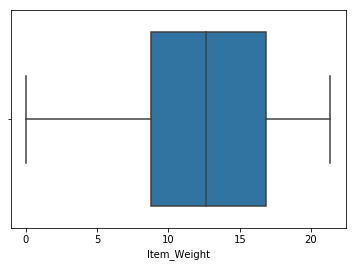

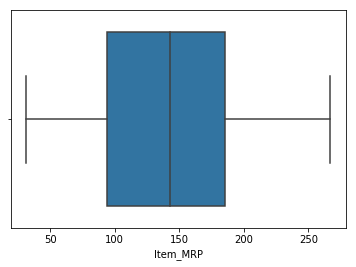

In [79]:
plt.figure(0)
sns.boxplot(x=dataset['Item_Weight'])
plt.figure(1)
sns.boxplot(x=dataset['Item_MRP'])
#We are able to conclude that there are no outliers

# SOME VISUALIZATION


<Figure size 432x288 with 0 Axes>

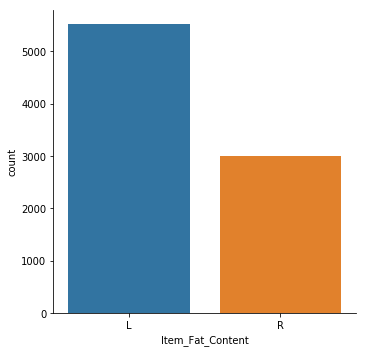

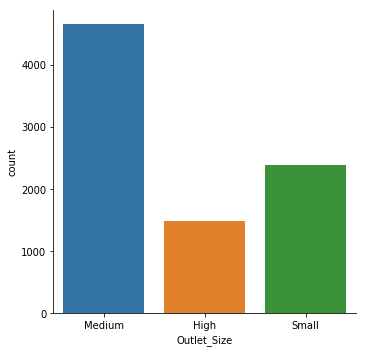

In [80]:
plt.figure(0)
sns.catplot('Item_Fat_Content',data=dataset,kind='count')
plt.figure(1)
sns.catplot('Outlet_Size',data=dataset,kind='count')

# FEATURE ENGINEERING

In [81]:
dataset.Item_Fat_Content.value_counts()

L    5517
R    3006
Name: Item_Fat_Content, dtype: int64

In [82]:
#Using Label Encoder To Convert String Values To Numbers
from sklearn.preprocessing import LabelEncoder
column_name=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type','Outlet_Identifier','Item_Identifier']
number=LabelEncoder()


In [83]:
for i in column_name:
      dataset[i]=number.fit_transform(dataset[i])


In [84]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,0,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [85]:
#Splitting X and Y
X=dataset.iloc[:,1:].values
y=dataset['Item_Outlet_Sales'].values

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)


In [100]:
from sklearn.linear_model import LinearRegression
Linear_Model=LinearRegression()

In [101]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [102]:
Linear_Model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [103]:
y_pred=Linear_Model.predict(X_test)
y_pred[:20]

array([1743.0644,  356.8688,  377.5086, 5778.4782, 2356.932 ,  865.54  ,
       4613.994 , 2410.8618, 1948.1308, 1937.478 ,  210.3928,  255.0014,
       4541.4218,  657.8104,  578.5802, 4229.1616, 1267.0174, 2388.8904,
       1797.66  , 4447.544 ])

In [104]:
y_test[:20]

array([1743.0644,  356.8688,  377.5086, 5778.4782, 2356.932 ,  865.54  ,
       4613.994 , 2410.8618, 1948.1308, 1937.478 ,  210.3928,  255.0014,
       4541.4218,  657.8104,  578.5802, 4229.1616, 1267.0174, 2388.8904,
       1797.66  , 4447.544 ])

In [107]:
accuracy=Linear_Model.score(X_test,y_test)
print('Accuracy Of The Model Is',accuracy*100,'%')

Accuracy Of The Model Is 100.0 %
